# House Price Prediciton : Linear Regression 

In [372]:
import numpy as np 
import pandas as pd 

## 1. Reading Dataset

In [373]:
df = pd.read_csv("dataset/data.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


## 2. Understanding Data

In [374]:
df.shape 

(2000, 10)

In [375]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


## 3. Handling Missing Values

In [377]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

## 4. One-Hot-Encoding:  Creating Dummies Variable for Multi class columns 

In [378]:
pd.get_dummies(df.Location)

,Downtown,Rural,Suburban,Urban
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,True,False
4,True,False,False,False
...,...,...,...,...
1995,False,False,True,False
1996,False,False,True,False
1997,False,True,False,False
1998,False,False,False,True


In [379]:
location_dummies = pd.get_dummies(df.Location, dtype=int)
location_dummies.head()

,Downtown,Rural,Suburban,Urban
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [380]:
condition_dummies = pd.get_dummies(df.Condition	, dtype=int)
condition_dummies.head()

,Excellent,Fair,Good,Poor
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


#### - Binary categorical feature → You can map it directly to 0 and 1 without creating multiple columns.

- Multi-category feature → You need dummy variables (one-hot encoding) to avoid assigning ordinal meaning where none exists.

In [381]:
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})
df["Garage"]

0       0
1       0
2       0
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Garage, Length: 2000, dtype: int64


### Merging Original DF and Dummies


In [382]:
merged = pd.concat([df, location_dummies, condition_dummies] , axis="columns")

In [383]:
merged.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Downtown,Rural,Suburban,Urban,Excellent,Fair,Good,Poor
0,1,1360,5,4,3,1970,Downtown,Excellent,0,149919,1,0,0,0,1,0,0,0
1,2,4272,5,4,3,1958,Downtown,Excellent,0,424998,1,0,0,0,1,0,0,0
2,3,3592,2,2,3,1938,Downtown,Good,0,266746,1,0,0,0,0,0,1,0
3,4,966,4,2,2,1902,Suburban,Fair,1,244020,0,0,1,0,0,1,0,0
4,5,4926,1,4,2,1975,Downtown,Fair,1,636056,1,0,0,0,0,1,0,0


## Dummy Variable Trap : 
- Dummy variable trap happens when all dummy columns from a category are included, because they add perfect multicollinearity.
- To avoid it, we keep k – 1 columns for each category with k unique values.

So:
#### Pick 1 column from each dummy group and drop it.
- From Condition dummies, drop 1 column (baseline).
- From Location dummies, drop 1 column (baseline).


#### ✅ Bottom line: You can drop any one dummy variable from each set without affecting model accuracy, but choose the baseline wisely if you care about interpreting results.


#### Which to drop
- To avoid the dummy variable trap (perfect multicollinearity), you should drop one from each group:

    - Location baseline: Drop Urban (most common & neutral reference)
    - Condition baseline: Drop Good (often the “average” condition)


In [384]:
# Droping Original and Dummy Traps and Unnecessary Cols

final = merged.drop(["Id", "Location", "Condition", "Urban","Good"], axis="columns")
final.head()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Downtown,Rural,Suburban,Excellent,Fair,Poor
0,1360,5,4,3,1970,0,149919,1,0,0,1,0,0
1,4272,5,4,3,1958,0,424998,1,0,0,1,0,0
2,3592,2,2,3,1938,0,266746,1,0,0,0,0,0
3,966,4,2,2,1902,1,244020,0,0,1,0,1,0
4,4926,1,4,2,1975,1,636056,1,0,0,0,1,0


#### Checking Null Values again

In [385]:
final.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Garage       0
Price        0
Downtown     0
Rural        0
Suburban     0
Excellent    0
Fair         0
Poor         0
dtype: int64

## 5. Selecting Features (X, y)

In [386]:
y = final.Price
y.head()


0    149919
1    424998
2    266746
3    244020
4    636056
Name: Price, dtype: int64

In [387]:
X = final.drop(["Price"], axis="columns")
X.head()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Downtown,Rural,Suburban,Excellent,Fair,Poor
0,1360,5,4,3,1970,0,1,0,0,1,0,0
1,4272,5,4,3,1958,0,1,0,0,1,0,0
2,3592,2,2,3,1938,0,1,0,0,0,0,0
3,966,4,2,2,1902,1,0,0,1,0,1,0
4,4926,1,4,2,1975,1,1,0,0,0,1,0


## 6. Feature Scaling


In [388]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Fit and transform X

X_scaled = scaler.fit_transform(X)

In [389]:
X_scaled

array([[-1.10147065,  1.40179052,  1.30556821, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 1.14748543,  1.40179052,  1.30556821, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 0.62231712, -0.70458141, -0.49832569, ..., -0.58581853,
        -0.5935192 , -0.58273899],
       ...,
       [-1.33161794,  1.40179052, -1.40027264, ..., -0.58581853,
        -0.5935192 ,  1.71603414],
       [ 0.9853011 , -0.00245743, -1.40027264, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 0.15661639,  1.40179052, -1.40027264, ..., -0.58581853,
         1.68486545, -0.58273899]])

## 7. Train-Test Split
    - Model is trained on one part, tested on unseen data:

#### Understand Parameters

    - test_size=0.2 : 0.2	 20% test set, 80% train set

    - random_state=42	: Any integer	Fixes the random shuffling for reproducibility

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 8. Train the Model


In [391]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [392]:
y_pred = model.predict(X_test)

print(len(y_pred))
print(y_pred)


400
[521988.22189839 549119.31196651 487101.22235594 539752.7439933
 553242.24872512 521375.92025826 523320.18080583 578133.64353335
 545899.64738458 577368.69940644 549359.90237922 583802.8656311
 511024.20843161 527181.17287186 502178.93122353 563657.42139779
 533851.47058016 557566.45545641 578893.4890812  522197.01288502
 535945.37429884 520333.81440515 520145.76012635 589984.6964629
 570910.91251258 530657.68307139 524849.79926253 533833.03412407
 517535.08657939 489462.64631857 471135.44970754 532885.36922583
 559703.53345149 566918.76753933 505186.85760171 504126.65238569
 566525.93875815 587039.42913431 533334.54147469 503067.97932305
 488794.10065586 540580.91705316 538165.7543287  538208.1073811
 539782.8193264  574195.17961934 551957.63060142 537147.22385255
 531554.19942009 528480.27403638 515181.27688738 549393.77262824
 567112.62323004 545742.10255364 516610.31460763 540624.51409841
 572646.45505536 503331.46804219 506163.52635772 515153.14850925
 545927.35223535 498381.4

In [393]:
model.score(X_scaled, y)


0.0065951926503550196

In [394]:
print(model.score(X_test, y_test))  # R² on test set
print(model.score(X_train, y_train))  # R² on train set


-0.006717808430749761
0.009856184863687778


## EXTRA

In [395]:
import numpy as np
np.isnan(X_scaled).sum()


np.int64(0)

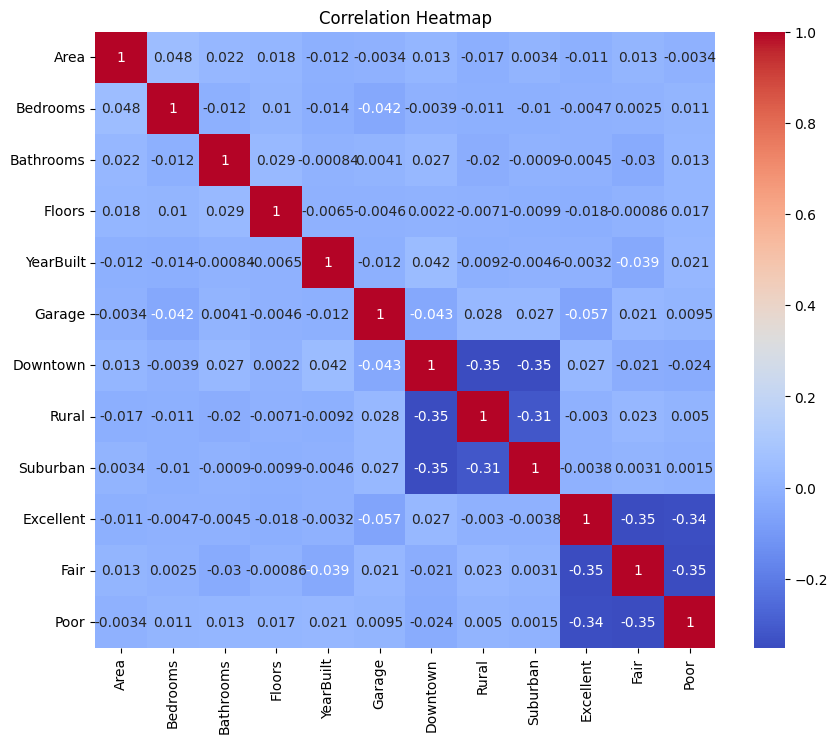

In [396]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If your data is X (without target column)
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [397]:
! pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Calculate VIF
X_np = np.array(X)
vif = [variance_inflation_factor(X_np, i) for i in range(X_np.shape[1])]

pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif
})


,Feature,VIF
0,Area,5.639068
1,Bedrooms,5.461362
2,Bathrooms,6.310087
3,Floors,7.069142
4,YearBuilt,28.036904
5,Garage,1.940025
6,Downtown,2.159251
7,Rural,1.981297
8,Suburban,1.999019
9,Excellent,2.111802


In [398]:
# sns.pairplot(df, x_vars=X.columns, y_vars='Price', kind='reg')
# plt.show()
# # 

In [399]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame of features (no target column)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      Feature        VIF
0        Area   5.639068
1    Bedrooms   5.461362
2   Bathrooms   6.310087
3      Floors   7.069142
4   YearBuilt  28.036904
5      Garage   1.940025
6    Downtown   2.159251
7       Rural   1.981297
8    Suburban   1.999019
9   Excellent   2.111802
10       Fair   2.128860
11       Poor   2.100792


In [400]:
# Remove YearBuilt from features
X = X.drop(["YearBuilt"], axis=1)

# If you already scaled before, you'll need to re-scale:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [401]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(len(X.columns))]
print(vif_data)


      Feature       VIF
0        Area  1.003621
1    Bedrooms  1.005070
2   Bathrooms  1.003471
3      Floors  1.001970
4      Garage  1.007712
5    Downtown  1.554316
6       Rural  1.511743
7    Suburban  1.516056
8   Excellent  1.575155
9        Fair  1.578777
10       Poor  1.569467


In [402]:
X_scaled

array([[-1.10147065,  1.40179052,  1.30556821, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 1.14748543,  1.40179052,  1.30556821, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 0.62231712, -0.70458141, -0.49832569, ..., -0.58581853,
        -0.5935192 , -0.58273899],
       ...,
       [-1.33161794,  1.40179052, -1.40027264, ..., -0.58581853,
        -0.5935192 ,  1.71603414],
       [ 0.9853011 , -0.00245743, -1.40027264, ...,  1.70701328,
        -0.5935192 , -0.58273899],
       [ 0.15661639,  1.40179052, -1.40027264, ..., -0.58581853,
         1.68486545, -0.58273899]])

In [403]:
# Droping Original and Dummy Traps and Unnecessary Cols

final = merged.drop(["Id", "Location", "Condition", "Urban","Good", "YearBuilt"], axis="columns")
final.head()
y = final.Price
y.head()
X = final.drop(["Price"], axis="columns")
X.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Fit and transform X

X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2 , random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))  # R² on test set
print(model.score(X_train, y_train))  # R² on train set


-0.005619550313781474
0.009622433861354085


In [404]:
import pandas as pd
pd.DataFrame({'Feature': X.columns, 'Correlation': [final[col].corr(y) for col in X.columns]}).sort_values(by='Correlation', ascending=False)


,Feature,Correlation
3,Floors,0.055890
9,Fair,0.049218
7,Suburban,0.040303
4,Garage,0.002842
6,Rural,0.001890
0,Area,0.001542
1,Bedrooms,-0.003471
5,Downtown,-0.003640
8,Excellent,-0.014552
2,Bathrooms,-0.015737
